In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools

In [2]:
def basis_generator(N):
  """
  N : total number of sites
  N//2 : number of electrons
  N//2 : number of unit cells
  """
  basis = []

  for combination_indices in itertools.combinations(range(N), N // 2):
    state = [0] * N
    for index in combination_indices:
      state[index] = 1
    basis.append(state)

  final_basis = []

  flag = 0
  for i in range(len(basis)):
    for j in range(0, N, 2):
      if (int(basis[i][j] + basis[i][j + 1]) == 2) or (int(basis[i][j] + basis[i][j + 1]) == 0):
        flag = 1
        break
    if flag == 0:
      final_basis.append(basis[i])
    else:
      flag = 0

  return np.array(final_basis, dtype=np.float64)

In [3]:
# def hamiltonian_generator(N, basis, v, w):
#   d = len(basis)
#   H = np.zeros((d, d))

#   for i in range(d):
#     for j in range(d):
#       H[i][j], _ = H_ij(i, j, basis, N, v, w)

#   return H


def hamiltonian_generator(N, basis, v, w):
  d = len(basis)
  H = np.zeros((d, d))

  for i in range(d):
    for j in range(d):
      H[j][i] = np.dot(H__ket(basis[i], N, v, w), basis[j])

  return H


# def hamiltonian_generator(N, basis, v, w):
#   d = len(basis)
#   H = np.zeros((d, d))

#   for i in range(d):
#     for j in range(d):
#       bra = np.divide(basis[j], np.linalg.norm(basis[j]))
#       H_ket = np.divide(H__ket(basis[i], N, v, w), np.linalg.norm(H__ket(basis[i], N, v, w)))
#       H[j][i] = np.dot(H_ket, bra)

#   return H



def H_ij(i, j, basis, N, v, w):
  ket = basis[i]
  H_ket = np.zeros((N))
  bra = basis[j]
  H_element = 0
  for k in range(0, N):
    if ket[k] == 1:
      H_ket[k] = 0
    else:
      H_ket[k] = C_dag(k, ket, v, w, N)

  for k in range(0, N):
    H_element += H_ket[k] * bra[k]

  return H_element, H_ket


def C_dag(k, ket, v, w, N):
  res = 0
  if k // 2 == 0:
    if ket[k + 1] == 1:
      res += v
    if k != 0 and ket[k - 1] == 1:
      res += w
  elif k // 2 == 1:
    if ket[k - 1] == 1:
      res += v
    if k != N - 1 and ket[k + 1] == 1:
      res += w
  return res


# def H__ket(ket, N, v, w):
#   res = np.zeros((N))
#   for i in range(N):
#     if ket[i] != 1:
#       if i % 2 == 0 and i - 1 > 0:
#         if ket[i - 1] == 1:
#           res[i] += w
#         if ket[i + 1] == 1:
#           res[i] += v
#       elif i % 2 == 1 and i + 1 < N:
#         if ket[i - 1] == 1:
#           res[i] += v
#         if ket[i + 1] == 1:
#           res[i] += w
#       elif i == 0 and ket[i + 1] == 1:
#         res[i] += v
#       elif i == N - 1 and ket[i - 1] == 1:
#         res[i] += v
#   return res


def H__ket(ket, N, v, w):
  res = np.zeros((N), dtype=np.float64)
  for i in range(N):
    if i % 2 == 0 and i - 1 > 0:
      if ket[i - 1] == 1:
        res[i] += w
      if ket[i + 1] == 1:
        res[i] += v
    elif i % 2 == 1 and i + 1 < N:
      if ket[i - 1] == 1:
        res[i] += v
      if ket[i + 1] == 1:
        res[i] += w
    elif i == 0 and ket[i + 1] == 1:
      res[i] += v
    elif i == N - 1 and ket[i - 1] == 1:
      res[i] += v
  return res


In [ ]:
N = 14
basis = basis_generator(N)
v = 1
w = 2

# for i in range(len(basis)):
#   # print(np.linalg.norm(basis[i]))
#   basis[i] = np.divide(basis[i], np.linalg.norm(basis[i]))
#   # print(basis[i])

for i in range(N):
  H_ket = H__ket(basis[i], N, v, w)
  print("----------")
  print(basis[i])
  print(H_ket)
print("----------")

H = hamiltonian_generator(N, basis, v, w)
print(H)
print(sp.linalg.ishermitian(H))
e_val, e_vec = np.linalg.eigh(H)
for e in e_val:
  print(e)

C:\Portable Softwares\VSCodium-win32-x64-1.100.23258\data\tmp\ipykernel_19152\3040851887.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


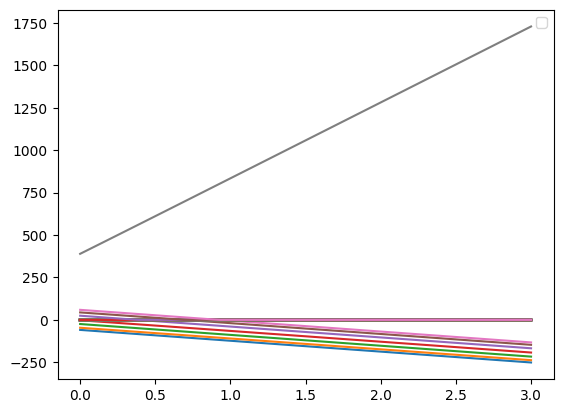

In [5]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 14
basis = basis_generator(N)
E_arr = np.zeros((steps, 2**int(N / 2)), dtype=np.float64)
E_vec_arr = np.zeros((steps, 2**int(N / 2), 2**int(N / 2)), dtype=np.float64)

for i, v in enumerate(v_arr):
  H = hamiltonian_generator(N, basis, v, w)

  e_val, e_vec = np.linalg.eigh(H)
  # print(H)
  # print(sp.linalg.ishermitian(H))
  idx = e_val.argsort()
  E_arr[i] = e_val[idx]
  E_vec_arr[i] = e_vec[:, idx]
  # print(len(e_vec))
  # print(len(e_vec[0]))

# print(len(E_arr[0]))

E_arr_T = E_arr.transpose()

# for i in range(steps):
#   for j in range(N):
#     E_arr_2[j,i] = E_arr[i][j]

# print(E_arr_2)

e_leb = 0
for e_arr in E_arr_T:
  e_leb += 1
  # if e_leb == :
  #   break
  plt.plot(v_arr,e_arr)

plt.legend()
plt.show()

In [12]:
selected_levels = list(range(3, 16))
print(selected_levels)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [ ]:
print(E_vec_arr)